**Let us import the required libraries.**

In [211]:
# import 'Pandas' 
import numpy as np

# import 'Pandas' 
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns=None

# display all rows of the dataframe
pd.options.display.max_rows=None

# to display the float values upto 6 decimal places  
pd.options.display.float_format= '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [212]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize']=[15,8]

#### Read the dataset and print the first five observations.

In [213]:
df_airfare = pd.read_excel('airfare.xlsx')
df_airfare.head(5)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [214]:
df_airfare.shape

(9000, 11)

**Interpretation:** The data has 9000 observations and 11 variables.

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [215]:
df_airfare.dtypes

Airline              object
Date                 object
Departure Station    object
Arrival Station      object
Route Map            object
Departure Time       object
Arrival Time         object
Journey Time         object
Stops                object
Extra Info           object
Price                 int64
dtype: object

**Interpretation:** All the input variables are categorical.

From the above output, we see that the data type of target variable Price is int64.

<a id="null"></a>
### Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [216]:
#sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_airfare.isnull().sum().sort_values(ascending=False)

In [217]:
# Calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Percent = (df_airfare.isnull().sum()*100/df_airfare.isnull().count()).sort_values(ascending=False)

In [218]:
# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys'
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total,Percent],axis=1,keys=['Total','Percentage'])
missing_data

,Total,Percentage
Price,0,0.000000
Extra Info,0,0.000000
Stops,0,0.000000
Journey Time,0,0.000000
Arrival Time,0,0.000000
Departure Time,0,0.000000
Route Map,0,0.000000
Arrival Station,0,0.000000
Departure Station,0,0.000000
Date,0,0.000000


**Interpretation:** The above output shows that there are no missing values in the data.

#### Split the dependent and independent variables.

In [219]:
# Store the target variable 'Price' in a dataframe df_target
df_target = df_airfare['Price']
df_target.columns = ["Price"]

In [220]:
df_target.head(5)

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [221]:
# Store the input features in a dataframe df_features
# drop the column 'Price'
df_features = df_airfare.drop('Price',axis=1)

In [222]:
df_features.head(5)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


# Feature Engineering

### converting the Journey Time field - hours in minutes.

In [223]:
df_features['Journey Time'] = df_features['Journey Time'].str.replace("h",'*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [224]:
df_features['Journey Time'].head(5)

0     170
1     445
2    1140
3     325
4     285
Name: Journey Time, dtype: int64

### Splitting the Date field into Journey Day and Journey Month  for better preprocessing in the model stage.

In [225]:
df_features['Journey Date'] = df_features['Date'].str.split('/').str[0].astype(int)
df_features['Journey Month'] = df_features['Date'].str.split('/').str[1].astype(int)
df_features.drop('Date',axis=1,inplace=True)

In [226]:
df_features['Journey Date'].head(5)

0    24
1     1
2     9
3    12
4     1
Name: Journey Date, dtype: int32

In [227]:
df_features['Journey Month'] .head(5)

0    3
1    5
2    6
3    5
4    3
Name: Journey Month, dtype: int32

### Similarly, we can extract ‘Departure Hour’ and ‘Departure Minute’ as well as ‘Arrival Hour and ‘Arrival Minute’ from ‘Departure Time’ and ‘Arrival Time’ variables respectively.

In [228]:
df_features['Departure Hour'] = pd.to_datetime(df_features['Departure Time']).dt.hour
df_features['Departure Minute'] = pd.to_datetime(df_features['Departure Time']).dt.minute
df_features.drop('Departure Time',axis=1,inplace=True)

In [229]:
df_features['Departure Hour'].head(5)

0    22
1     5
2     9
3    18
4    16
Name: Departure Hour, dtype: int64

In [230]:
df_features['Departure Minute'].head(5)

0    20
1    50
2    25
3     5
4    50
Name: Departure Minute, dtype: int64

In [231]:
df_features['Arrival Hour'] = pd.to_datetime(df_features['Arrival Time']).dt.hour
df_features['Arrival Minute'] = pd.to_datetime(df_features['Arrival Time']).dt.minute
df_features.drop('Arrival Time',axis=1,inplace=True)

In [232]:
df_features['Arrival Hour'].head(5)

0     1
1    13
2     4
3    23
4    21
Name: Arrival Hour, dtype: int64

In [233]:
df_features['Arrival Minute'].head(5)

0    10
1    15
2    25
3    30
4    35
Name: Arrival Minute, dtype: int64

### Now after final preprocessing let’s see our dataset

In [234]:
df_features.head(5)

,Airline,Departure Station,Arrival Station,Route Map,Journey Time,Stops,Extra Info,Journey Date,Journey Month,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,1,3,16,50,21,35


## Plotting Correlation to find Multicollinearity

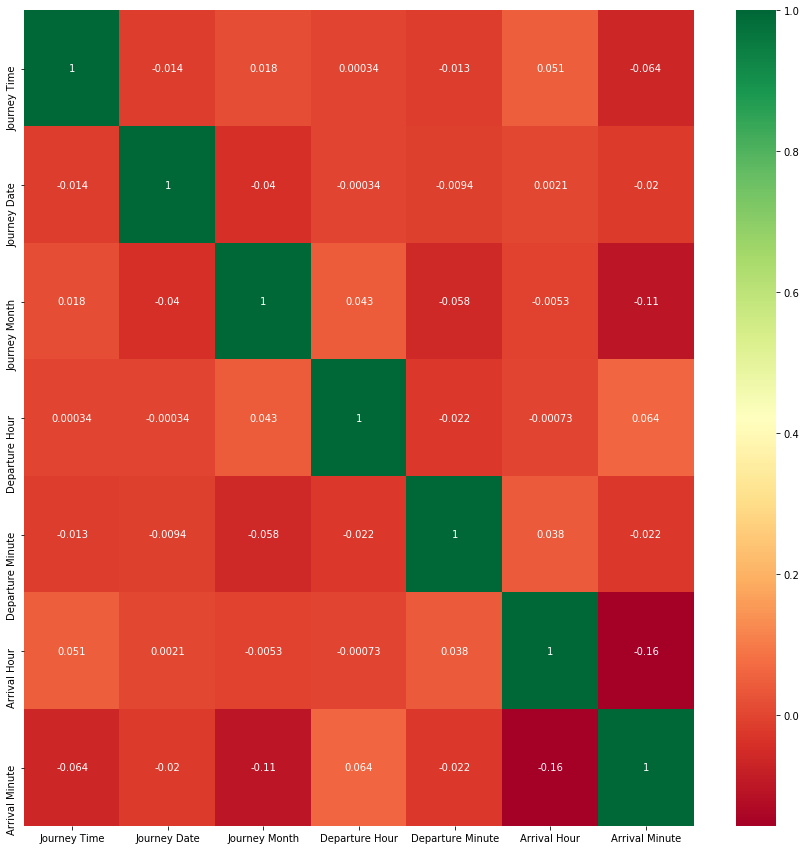

In [235]:
plt.figure(figsize = (15,15))
sns.heatmap(df_features.corr(), annot = True, cmap = "RdYlGn")
plt.show()

there is no Multicollinearity present in independent features, this is good for regression model

### Handling Categorical Data

Airline, Departure Station, Arrival Station	, Route Map, Stops, Extra Info are the categorical variables we have in our data. Let’s handle each one by one.

Let’s see how the Airline variable is related to the Price variable.

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Jet Airways                          3227
IndiGo                               1757
Air India                            1471
Multiple carriers                    1014
SpiceJet                              697
Vistara                               399
Air Asia                              256
GoAir                                 160
Multiple carriers Premium economy      11
Jet Airways Business                    4
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


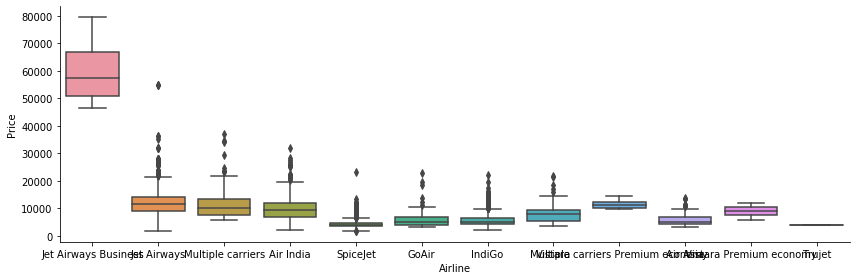

In [236]:
#Taking care of Airline column
print(df_airfare['Airline'].unique())
#print(train['Airline'].nunique())
print(df_airfare['Airline'].value_counts())
sns.catplot(y = 'Price', x = 'Airline', data = df_airfare.sort_values('Price', ascending = False), 
            kind='box', height = 4, aspect = 3, orient='v')
plt.show()

### As we can see the name of the airline matters. ‘JetAirways Business’ has the highest price range. Other airlines price also varies.

### Since the Airline variable is Nominal Categorical Data (There is no order of any kind in airline names) we will use one-hot encoding to handle this variable.

# Data Visualization

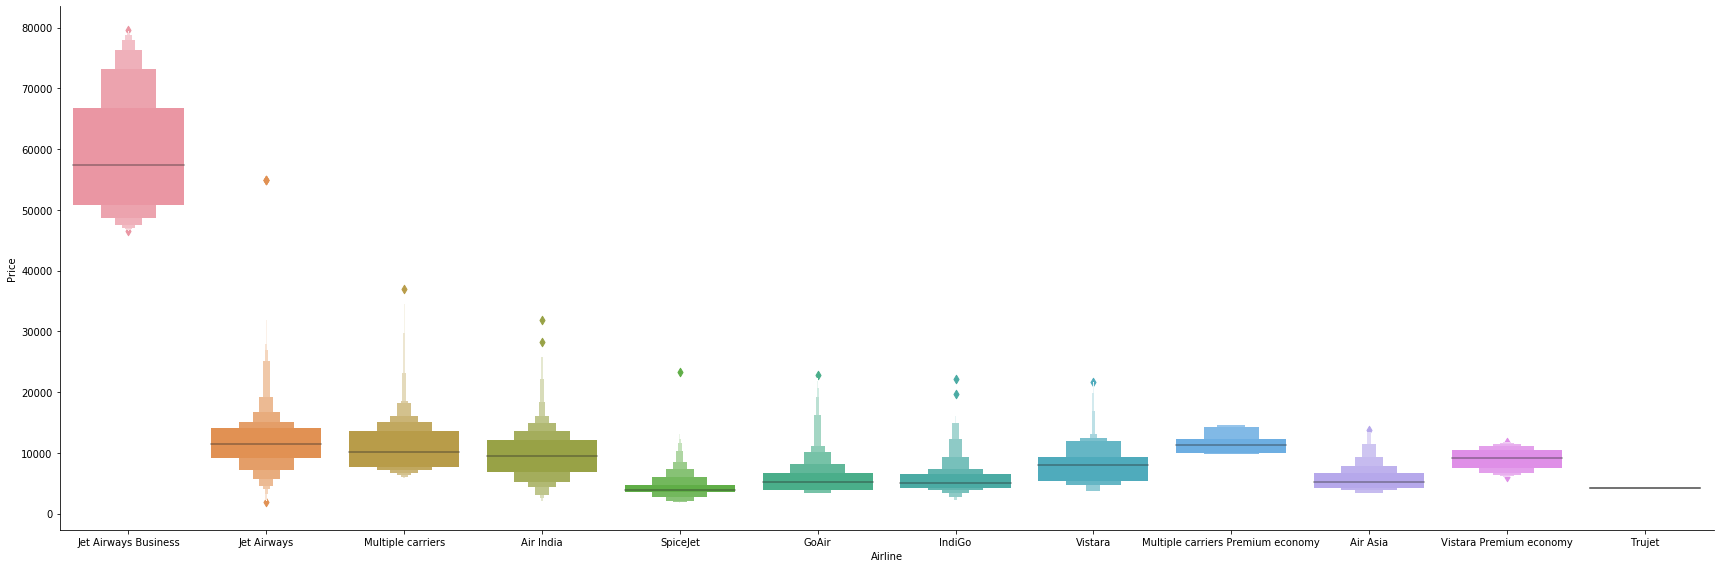

In [237]:
# Plotting Price vs Airline plot
sns.catplot(y = "Price", x = "Airline", data = df_airfare.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

Inference: Here with the help of catplot we are trying to plot the boxplot between the price of the flight and airline and we can draw the conclusion that Jet airways has the most outliers in terms of price.

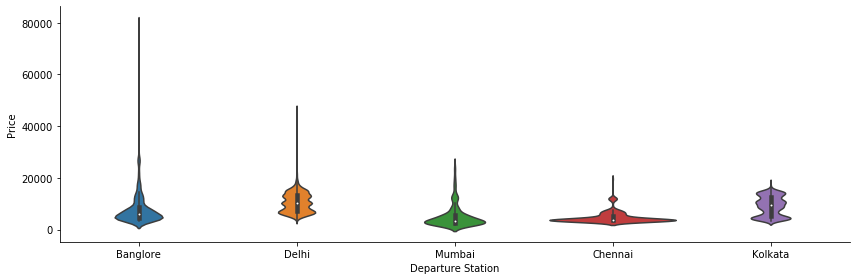

In [238]:
# Plotting Violin plot for Price vs Departure Station
sns.catplot(y = "Price", x = "Departure Station", data = df_airfare.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

Inference: Now with the help of catplot only we are plotting a box plot between the price of the flight and the departure place i.e. the place from where passengers will travel to the destination and we can see that Banglore as the departure location has the most outliers while Chennai has the least.

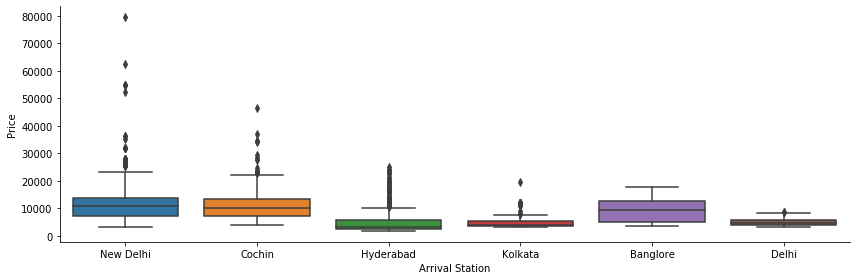

In [239]:
# Plotting Box plot for Price vs Arrival Station
sns.catplot(y = "Price", x = "Arrival Station", data = df_airfare.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

Inference: Here we are plotting the box plot with the help of catplot between price of the flight and destination to which passenger is travelling to and figured out that New delhi has the most outliers and Kolkata has the least

In [240]:
Airline = df_features[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first = True)
Airline.head(5)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


concat Airline with main features

In [241]:
df_features = pd.concat([df_features,Airline],axis=1)

In [242]:
df_features.head(5)

,Airline,Departure Station,Arrival Station,Route Map,Journey Time,Stops,Extra Info,Journey Date,Journey Month,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0


In [243]:
df_features.shape[1]

24

## Again ‘Departure Station’ and ‘Arrival Station’ variables are Nominal Categorical Data. We will use One-Hot encoding again to handle these two variables.

In [244]:
DepartureStation = df_features[["Departure Station"]]
DepartureStation = pd.get_dummies(DepartureStation,drop_first=True)
DepartureStation.head(5)

,Departure Station_Chennai,Departure Station_Delhi,Departure Station_Kolkata,Departure Station_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


concat DepartureStation with df_features 

In [245]:
df_features = pd.concat([df_features,DepartureStation],axis=1)

In [246]:
df_features.head(5)

,Airline,Departure Station,Arrival Station,Route Map,Journey Time,Stops,Extra Info,Journey Date,Journey Month,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Departure Station_Chennai,Departure Station_Delhi,Departure Station_Kolkata,Departure Station_Mumbai
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [247]:
df_features.shape[1]

28

In [248]:
ArrivalStation = df_features[["Arrival Station"]]
ArrivalStation = pd.get_dummies(ArrivalStation,drop_first=True)
ArrivalStation.head(5)

,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


concat df_features with ArrivalStation

In [249]:
df_features = pd.concat([df_features,ArrivalStation],axis=1)

In [250]:
df_features.head(5)

,Airline,Departure Station,Arrival Station,Route Map,Journey Time,Stops,Extra Info,Journey Date,Journey Month,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Departure Station_Chennai,Departure Station_Delhi,Departure Station_Kolkata,Departure Station_Mumbai,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [251]:
df_features.shape[1]

33

## Route Map variable represents the path of the journey. Since the ‘Stops’ variable captures the information if the flight is direct or connected so I have decided to drop this variable.

In [252]:
df_features.drop(["Route Map"],axis=1,inplace=True)
df_features.head(5)

,Airline,Departure Station,Arrival Station,Journey Time,Stops,Extra Info,Journey Date,Journey Month,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Departure Station_Chennai,Departure Station_Delhi,Departure Station_Kolkata,Departure Station_Mumbai,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi
0,IndiGo,Banglore,New Delhi,170,non-stop,No info,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,445,2 stops,No info,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1140,2 stops,No info,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,325,1 stop,No info,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,285,1 stop,No info,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [253]:
df_features.shape[1]

32

### Stops Variable

In [254]:
df_features['Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops'], dtype=object)

Here, non-stop means 0 stops which means direct flight. Similarly meaning other values is obvious. We can see it is an Ordinal Categorical Data so we will use LabelEncoder here to handle this variable.

In [255]:
df_features.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3},inplace=True)

## Extra Info variable

In [256]:
df_features['Extra Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight'], dtype=object)

As we can see, this feature captures relevant that can affect flight price significantly. Also ‘ No Info’ values are repeated. Let’s handle that first.

In [257]:
df_features['Extra Info'].replace({"No info":"No Info"},inplace=True)

In [258]:
df_features['Extra Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight'], dtype=object)

Now this variable is also Nominal Categorical Data. Let’s use One-Hot Encoding to handle this variable.

In [259]:
extra_info = df_features['Extra Info']
extra_info = pd.get_dummies(extra_info,drop_first=True)

In [260]:
extra_info.head(5)

,1 Short layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


Now we will create the final dataframe by concatenating all the One-hot and Label-encoded features to the original dataframe. We will also remove original variables using which we have prepared new encoded variables.

In [261]:
df_features = pd.concat([df_features,extra_info],axis=1)

In [262]:
df_features.head(5)

,Airline,Departure Station,Arrival Station,Journey Time,Stops,Extra Info,Journey Date,Journey Month,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Departure Station_Chennai,Departure Station_Delhi,Departure Station_Kolkata,Departure Station_Mumbai,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi,1 Short layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight
0,IndiGo,Banglore,New Delhi,170,0,No Info,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,445,2,No Info,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Jet Airways,Delhi,Cochin,1140,2,No Info,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,325,1,No Info,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,IndiGo,Banglore,New Delhi,285,1,No Info,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [263]:
df_features.shape[1]

39

In [264]:
df_features.drop(['Airline','Departure Station','Arrival Station','Extra Info'],axis=1,inplace=True)

In [265]:
df_features.head(5)

,Journey Time,Stops,Journey Date,Journey Month,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Departure Station_Chennai,Departure Station_Delhi,Departure Station_Kolkata,Departure Station_Mumbai,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi,1 Short layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight
0,170,0,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,445,2,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1140,2,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,325,1,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,285,1,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


Let’s see the number of final variables we have in dataframe

In [266]:
df_features.shape[1]

35

In [267]:
df_features.head(5)

,Journey Time,Stops,Journey Date,Journey Month,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Departure Station_Chennai,Departure Station_Delhi,Departure Station_Kolkata,Departure Station_Mumbai,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi,1 Short layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight
0,170,0,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,445,2,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1140,2,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,325,1,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,285,1,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


So, we have 36 variables in the final dataframe including the dependent variable ‘Price’. There are only 35 variables for training.

# Scaling

The next step is to bring the data to a common scale, since there are certain columns with very small values and some columns with high values. This process is important as values on a similar scale allow the model to learn better

‘StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance’

In [268]:
sc= StandardScaler()

In [269]:
df_features_sc = sc.fit_transform(df_features)

In [270]:
df_features_sc = pd.DataFrame(df_features_sc,columns=df_features.columns)

In [271]:
df_features_sc.head(5)

,Journey Time,Stops,Journey Date,Journey Month,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Departure Station_Chennai,Departure Station_Delhi,Departure Station_Kolkata,Departure Station_Mumbai,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi,1 Short layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight
0,-0.929838,-1.220018,1.240101,-1.460960,1.660558,-0.229679,-1.802905,-0.889873,-0.442016,-0.134535,2.030361,-0.747651,-0.021087,-0.356332,-0.034982,-0.289734,-0.010542,-0.215383,-0.018260,-0.192006,-0.861096,-0.605593,-0.262940,-0.861096,-0.367913,-0.262940,-0.192006,3.250865,-0.010542,-0.018260,-0.021087,-0.473628,0.525063,-0.175863,-0.010542
1,-0.384884,1.750403,-1.473410,0.255237,-1.300163,1.370873,-0.050338,-0.587241,2.262363,-0.134535,-0.492523,-0.747651,-0.021087,-0.356332,-0.034982,-0.289734,-0.010542,-0.215383,-0.018260,-0.192006,-0.861096,1.651275,-0.262940,-0.861096,-0.367913,-0.262940,-0.192006,-0.307610,-0.010542,-0.018260,-0.021087,-0.473628,0.525063,-0.175863,-0.010542
2,0.992363,1.750403,-0.529580,1.113335,-0.603522,0.037079,-1.364763,0.018023,-0.442016,-0.134535,-0.492523,1.337523,-0.021087,-0.356332,-0.034982,-0.289734,-0.010542,-0.215383,-0.018260,-0.192006,1.161311,-0.605593,-0.262940,1.161311,-0.367913,-0.262940,-0.192006,-0.307610,-0.010542,-0.018260,-0.021087,-0.473628,0.525063,-0.175863,-0.010542
3,-0.622682,0.265193,-0.175644,0.255237,0.963918,-1.029956,1.410135,0.320656,-0.442016,-0.134535,2.030361,-0.747651,-0.021087,-0.356332,-0.034982,-0.289734,-0.010542,-0.215383,-0.018260,-0.192006,-0.861096,1.651275,-0.262940,-0.861096,-0.367913,-0.262940,-0.192006,-0.307610,-0.010542,-0.018260,-0.021087,-0.473628,0.525063,-0.175863,-0.010542
4,-0.701948,0.265193,-1.473410,-1.460960,0.615598,1.370873,1.118040,0.623288,-0.442016,-0.134535,2.030361,-0.747651,-0.021087,-0.356332,-0.034982,-0.289734,-0.010542,-0.215383,-0.018260,-0.192006,-0.861096,-0.605593,-0.262940,-0.861096,-0.367913,-0.262940,-0.192006,3.250865,-0.010542,-0.018260,-0.021087,-0.473628,0.525063,-0.175863,-0.010542


In [272]:
df_features_sc.shape[1]

35

# Apply Machine Learning Algorithms:

## Regression Models

# train test split

In [273]:
X_train, X_test , y_train, y_test = train_test_split(df_features_sc,df_target,random_state=42,test_size=0.25)

In [274]:
X_train.shape

(6750, 35)

In [275]:
X_test.shape

(2250, 35)

In [276]:
y_train.shape

(6750,)

In [277]:
y_test.shape

(2250,)

### MLR

#### Create a generalized function to calculate the RMSE for train and test set.

In [278]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [279]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

#### Create a generalized function to calculate the MAPE for test set.

In [280]:
# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)
    
    # calculate the mape using the "mape()" function created above
    # calculate the MAPE for the test data
    mape_test = mape(y_test, test_pred)

    # return the MAPE for the test set
    return(mape_test)

#### Create a generalized function to calculate the R-Squared and Adjusted R- Squared

In [281]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model):
    
    # score() returns the R-squared value
    r_sq = model.score(X_train, y_train)
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = X_train.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = X_train.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq, r_sq_adj])

#### Create a generalized function to create a dataframe containing the scores from all the models

In [282]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

# create a function to update the score card for comparision of the scores from different algorithms
# pass the model name, model build, alpha and l1_ration as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

#### Create a generalized function to plot a barchart for the coefficients

In [283]:
# define a function to plot a barplot
# pass the model 
def plot_coefficients(model, algorithm_name):
    # create a dataframe of variable names and their corresponding value of coefficients obtained from model
    # 'columns' returns the column names of the dataframe 'X'
    # 'coef_' returns the coefficient of each variable
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})

    # sort the dataframe in descending order
    # 'sort_values' sorts the column based on the values
    # 'ascending = False' sorts the values in the descending order
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)

    # plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
    # pass the data to the parameter, 'sorted_coeff' to plot the barplot
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    
    # add x-axis label
    # set the size of the text using 'fontsize'
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)

    # add y-axis label
    # set the size of the text using 'fontsize'
    plt.ylabel('Features', fontsize = 15)

In [284]:
linreg = LinearRegression()

In [285]:
MLR_model = linreg.fit(X_train,y_train)

In [286]:
MLR_model.score(X_train,y_train)

0.6897194564967746

In [287]:
# print training RMSE
print('RMSE on train set: ', get_train_rmse(MLR_model))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(MLR_model))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(MLR_model) - get_train_rmse(MLR_model))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  2610.4476
RMSE on test set:  2458.1046
Difference between RMSE on train and test set:  152.34299999999985


**Interpretation:** RMSE on the training set is 2610.4476, while on the test set it is 2458.1046. We can see that there is a some difference in the RMSE of the train and the test set. This implies that our model has overfitted on the train set. 

To deal with the problem of overfitting, we study the approach of `Regularization` in the later section. 

In [288]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression', model = MLR_model)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.689719,0.688102,2458.104600,21.960867


<a id="cv"></a>
# Cross Validation

# K-Fold Cross Validation

K-Fold cross validation is where a given dataset is divided into K folds where at some stage each fold is used as a test set.

In [289]:
# n_splits: specify the number of k folds
kf = KFold(n_splits = 5)

In [290]:
# create a function 'get_score' that returns the R-squared score for the training set
# 'get_score' takes 5 input parameters
def Get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)                                   # fit the model
    return model.score(X_test_k, y_test_k)                            # return the R-squared value

In [291]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(df_features_sc,df_target, random_state = 42, test_size = 0.25)

In [292]:
# create an empty list to store the scores
scores = []

# kf.split() splits the indices of X_train into train_index and test_index
# further dividing the X_train and y_train sets into train and test sets for cross validation
# Remember: Cross validation works on training set not on test set
# use '\' for stacking the code 
for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k, y_train_k, y_test_k = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
   
    # call the function 'get_scores()' and append the scores in the list 'scores'
    scores.append(Get_score(LinearRegression(), X_train_k, X_test_k, y_train_k, y_test_k)) 
    
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.6838800841257225, 0.6874449852750161, 0.1930342724852312, 0.6771910476863074, -1.1744231527061896e+17]

Minimum score obtained:  -1.1744231527061896e+17
Maximum score obtained:  0.6874
Average score obtained:  -2.348846305412379e+16


### K-Fold Cross Validation using `cross_val_score()`

cross_val_score()` also does the stratified sampling internally if required

In [293]:
# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing linear regression
# pass the X_train and y_train sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the scoring parameter e.g. 'r2' for r-squared, 'neg_mean_squared_error' for mean squared error (negative)
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'r2')

In [294]:
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [ 6.83880084e-01  6.87444985e-01  1.93034272e-01  6.77191048e-01
 -1.17442315e+17]

Minimum score obtained:  -1.1744231527061896e+17
Maximum score obtained:  0.6874
Average score obtained:  -2.348846305412379e+16


We can see that we got the same scores from `KFold()` and `cross_val_score()`.

<a id="loocv"></a>
## Leave One Out Cross Validation (LOOCV)
It is a process in which the model is trained on the training dataset, with the exception of only one data point, which is used to test the model. This method increases the variance, as only one data point is used for testing. LOOCV can be time consuming as k is equal to the number of observations.

In LOOCV, the estimates from each fold are highly correlated and their average can have a high level of variance.

In [295]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(df_features_sc,df_target, random_state = 42, test_size = 0.25)

In [296]:
# creating a function 'get_score' that returns the R-squared score for the training set
# 'get_score' takes 5 input parameters
def Get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)                               # fit the model
    return model.score(X_test_k, y_test_k)                        # return the R-squared value

In [297]:
# create an empty to store the MSE for each model
loocv_rmse = []

# instantiate the LOOCV method 
loocv = LeaveOneOut()

# use the for loop to build the regression model for each cross validation 
# use split() to split the dataset into two subsets; one with (n-1) data points and another with 1 data point
# where, n = total number of observations

for train_index, test_index in loocv.split(X_train):
    # create the train dataset, use iloc[] to retrieve the corresponding observations in train data
    # create the test dataset, use iloc[] to retrieve the corresponding observations in test data
    # # use '\' for stacking the code 
    X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    
    # instantiate the regression model
    linreg = LinearRegression()
    
    # fit the model on training dataset
    linreg.fit(X_train_l, y_train_l)
    
    # calculate MSE using test dataset
    # use predict() to predict the values of target variable
    mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
    
    # calculate the RMSE
    rmse = np.sqrt(mse)
    
    # use append() to add each RMSE to the list 'loocv_rmse'
    loocv_rmse.append(rmse)

In [298]:
# print the minimum rmse from the list
# use 'round()' to round-off the minimum rmse upto 4 digits
# min() returns minimum rmse 
print("\nMinimum rmse obtained: ", round(min(loocv_rmse), 4))

# print the maximum rmse from the list
# use 'round()' to round-off the maximum rmse upto 4 digits
# max() returns maximum rmse 
print("Maximum rmse obtained: ", round(max(loocv_rmse), 4))

# print the average rmse from the list
# use 'round()' to round-off the average rmse upto 4 digits
# np.mean() returns average rmse 
print("Average rmse obtained: ", round(np.mean(loocv_rmse), 4))


Minimum rmse obtained:  0.1611
Maximum rmse obtained:  4.5894174510500856e+16
Average rmse obtained:  7228087443011.325


<a id="SGD"></a>
## Stochastic Gradient Descent

The gradient descent method considers all the data points to calculate the values of the parameters at each step. For a very large dataset, this method becomes computationally expensive. To avoid this problem, we use Stochastic Gradient Descent (SGD) which considers a single data point (sample) to perform each iteration. Each sample is randomly selected for performing the iteration.

####  Build MLR model using SGD method.

In [299]:
# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 10)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train, y_train)

# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(linreg_with_SGD))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

RMSE on train set: 3840423241.5576
RMSE on test set: 583078390.3493


In [300]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression (using SGD)', model = linreg_with_SGD)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.689719,0.688102,2458.104600,21.960867
1,Linear Regression (using SGD),-,-,-671556824584.951538,-675057642109.602783,583078390.349300,5612029.619761


<a id="ridge"></a>
## Ridge Regression

Most of the times our data can show multicollinearity in the variables. To analyze such data we can use `Ridge Regression`. It uses the L2 norm for regularization. 

#### Build regression model using Ridge Regression for alpha = 1.

In [301]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run 
ridge = Ridge(alpha = 1, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 2457.9133


**Interpretation:** After applying the ridge regression with alpha equal to one, we get 2457.9133 as the RMSE value.

In [302]:
# update the dataframe 'score_card'
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.689719,0.688102,2458.104600,21.960867
1,Linear Regression (using SGD),-,-,-671556824584.951538,-675057642109.602783,583078390.349300,5612029.619761
2,Ridge Regression (with alpha = 1),1,-,0.689714,0.688097,2457.913300,21.961836


#### Build regression model using Ridge Regression for alpha = 2.

In [303]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
ridge_alpha_2 = Ridge(alpha = 2, max_iter = 500)

# fit the model on train set
ridge_alpha_2.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge_alpha_2))

RMSE on test set: 2457.7654


**Interpretation:** After applying the ridge regression with alpha equal to two, the RMSE value decreased to 2457.7654.

**Interpretation:** The coefficients obtained from ridge regression have smaller values as compared to the coefficients obtained from linear regression using OLS.

In [304]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Ridge Regression (with alpha = 2)', model = ridge, alpha = '2')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.689719,0.688102,2458.104600,21.960867
1,Linear Regression (using SGD),-,-,-671556824584.951538,-675057642109.602783,583078390.349300,5612029.619761
2,Ridge Regression (with alpha = 1),1,-,0.689714,0.688097,2457.913300,21.961836
3,Ridge Regression (with alpha = 2),2,-,0.689714,0.688097,2457.913300,21.961836


<a id="lasso"></a>
## Lasso Regression

Lasso regression shrinks the less important variable's coefficient to zero which makes this technique more useful when we are dealing with large number of variables. It is a type of regularization technique that uses L1 norm for regularization. 

In [305]:
# use Lasso() to perform lasso regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
lasso = Lasso(alpha = 0.01, max_iter = 500)

# fit the model on train set
lasso.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 2458.085


**Interpretation:** After applying the lasso regression with alpha equal to 0.01, the RMSE value is 0.8198.

In [306]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.689719,0.688102,2458.104600,21.960867
1,Linear Regression (using SGD),-,-,-671556824584.951538,-675057642109.602783,583078390.349300,5612029.619761
2,Ridge Regression (with alpha = 1),1,-,0.689714,0.688097,2457.913300,21.961836
3,Ridge Regression (with alpha = 2),2,-,0.689714,0.688097,2457.913300,21.961836
4,Lasso Regression,0.01,-,0.689719,0.688102,2458.085000,21.961094


**Interpretation:** After applying the lasso regression with alpha equal to 0.01, the RMSE value is 2458.085000.

<a id="elastic"></a>
## Elastic Net Regression

This technique is a combination of Rigde and Lasso reression techniques. It considers the linear combination of penalties for L1 and L2 regularization.

In [307]:
# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'l1_ratio = 0' performs Ridge regression
# 'l1_ratio = 1' performs Lasso regression
# pass number of iterations to 'max_iter'
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train data
enet.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 2499.9861


In [308]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.689719,0.688102,2458.104600,21.960867
1,Linear Regression (using SGD),-,-,-671556824584.951538,-675057642109.602783,583078390.349300,5612029.619761
2,Ridge Regression (with alpha = 1),1,-,0.689714,0.688097,2457.913300,21.961836
3,Ridge Regression (with alpha = 2),2,-,0.689714,0.688097,2457.913300,21.961836
4,Lasso Regression,0.01,-,0.689719,0.688102,2458.085000,21.961094
5,Elastic Net Regression,0.1,0.01,0.672068,0.670358,2499.986100,22.540182


<a id="GScv"></a>
# GridSearchCV

Hyperparameters are the parameters in the model that are preset by the user. GridSearch considers all the combinations of hyperparameters and returns the best hyperparameter values. Following are some of the parameters that GridSearchCV takes:

1. estimator: pass the machine learning algorithm model
2. param_grid: takes a dictionary having parameter names as keys and list of parameters as values
3. cv: number of folds for k-fold cross validation

### Find optimal value of alpha for `Ridge Regression`

In [309]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

# print the RMSE for test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 1} 

RMSE on test set: 2457.9133


**Interpretation:** With the optimal value of alpha that we got from GridSearchCV, the RMSE of test set decreased to 2457.9133.

In [310]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.689719,0.688102,2458.104600,21.960867
1,Linear Regression (using SGD),-,-,-671556824584.951538,-675057642109.602783,583078390.349300,5612029.619761
2,Ridge Regression (with alpha = 1),1,-,0.689714,0.688097,2457.913300,21.961836
3,Ridge Regression (with alpha = 2),2,-,0.689714,0.688097,2457.913300,21.961836
4,Lasso Regression,0.01,-,0.689719,0.688102,2458.085000,21.961094
5,Elastic Net Regression,0.1,0.01,0.672068,0.670358,2499.986100,22.540182
6,Ridge Regression (using GridSearchCV),1,-,0.689714,0.688097,2457.913300,21.961836


### Find optimal value of alpha for `Lasso Regression`

In [311]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     
# 'max_iter':100,500,1000,1500,2000
 
# initiate the lasso regression model 
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 0.1} 

RMSE on test set: 2458.0546


**Interpretation:** With the optimal value of alpha that we got from GridSearchCV, the RMSE of test set is 2458.0546.

In [312]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.689719,0.688102,2458.104600,21.960867
1,Linear Regression (using SGD),-,-,-671556824584.951538,-675057642109.602783,583078390.349300,5612029.619761
2,Ridge Regression (with alpha = 1),1,-,0.689714,0.688097,2457.913300,21.961836
3,Ridge Regression (with alpha = 2),2,-,0.689714,0.688097,2457.913300,21.961836
4,Lasso Regression,0.01,-,0.689719,0.688102,2458.085000,21.961094
5,Elastic Net Regression,0.1,0.01,0.672068,0.670358,2499.986100,22.540182
6,Ridge Regression (using GridSearchCV),1,-,0.689714,0.688097,2457.913300,21.961836
7,Lasso Regression (using GridSearchCV),0.100000,-,0.689719,0.688102,2458.054600,21.960097


### Display the score card summary

We sort the dataframe `score_card` to get the model with least RMSE in the top.

In [313]:
# sort the dataframe 'score_card' on 'Test_RMSE' in an ascending order using 'sort_values' 
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)

# color the cell in the column 'Test_RMSE' having minimum RMSE value
# 'style.highlight_min' assigns color to the minimum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Ridge Regression (with alpha = 1),1,-,0.689714,0.688097,2457.91,21.9618
1,Ridge Regression (with alpha = 2),2,-,0.689714,0.688097,2457.91,21.9618
2,Ridge Regression (using GridSearchCV),1,-,0.689714,0.688097,2457.91,21.9618
3,Lasso Regression (using GridSearchCV),0.1,-,0.689719,0.688102,2458.05,21.9601
4,Lasso Regression,0.01,-,0.689719,0.688102,2458.09,21.9611
5,Linear Regression,-,-,0.689719,0.688102,2458.1,21.9609
6,Elastic Net Regression,0.1,0.01,0.672068,0.670358,2499.99,22.5402
7,Linear Regression (using SGD),-,-,-6.71557e+11,-6.75058e+11,5.83078e+08,5.61203e+06


**Interpretation:** We can see that `Ridge Regression (using GridSearchCV)` has the lowest test RMSE. Here, ridge regression with `alpha = 20` seems to deal with the problem of overfitting efficiently.

# Save the Model and dump as a Pickle File

In [314]:
import pickle
# dump information to the file
pickle.dump(ridge_alpha_2, open('ridge_alpha_2.pkl', 'wb'))
model = pickle.load(open('ridge_alpha_2.pkl', 'rb'))

In [315]:
result = model.score(X_test, y_test)
print(result)

0.6808248128540081


## predict using the saved model

In [316]:
predicted_price=model.predict([[180, 0,	24,	3,	22,	20,	1,	10,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0]])

In [317]:
print('the saved model is predicting price based on test data:',predicted_price )

the saved model is predicting price based on test data: [5705.01799246]


# Feature Engineering - make use of the data file ‘distance.csv’ to improve the model performance

In [318]:
df_airfare2 = pd.read_excel('airfare.xlsx')
df_airfare.head(5)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [319]:
df_dist = pd.read_csv('air_distance.csv')
df_dist.head(5)

,Unnamed: 0,Source,Dest,Distance(Km)
0,0,BLR,DEL,1709.710000
1,1,CCU,IXR,327.840000
2,2,IXR,BBI,344.540000
3,3,BBI,BLR,1166.170000
4,4,DEL,LKO,423.410000


In [320]:
def route_distance(str):
    a = str.split('→')
    b= []
    for i in a:
        b.append(i.strip())
    #return b
    sum = 0
    for j in range(0,len(b)-1) :
        for k in range(0,len(df_dist)):
            if b[j] == df_dist['Source'][k] and b[j+1] == df_dist['Dest'][k]:
                sum = sum + df_dist['Distance(Km)'][k]
    return sum

In [321]:
distance = []
for i in range(0,len(df_airfare2)):
    distance.append(route_distance(df_airfare2['Route Map'][i]))
df_airfare2["Distance(km)"] = distance

In [322]:
df_airfare2.isnull().sum()

Airline              0
Date                 0
Departure Station    0
Arrival Station      0
Route Map            0
Departure Time       0
Arrival Time         0
Journey Time         0
Stops                0
Extra Info           0
Price                0
Distance(km)         0
dtype: int64

No mising value in newly added Distance field

### data preprocessing

In [323]:
df_features2 = df_airfare2.drop('Price',axis=1)
df_target2 = df_airfare2['Price']
df_target2.columns = ["Price"]

In [324]:
df_features2['Journey Time'] = df_features2['Journey Time'].str.replace("h",'*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [326]:
df_features2.head(5)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Distance(km)
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,1709.710000
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,1838.550000
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,2671.330000
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,1874.710000
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,853.490000


In [327]:
df_features2['Journey Date'] = df_features2['Date'].str.split('/').str[0].astype(int)
df_features2['Journey Month'] = df_features2['Date'].str.split('/').str[1].astype(int)
df_features2.drop('Date',axis=1,inplace=True)

df_features2['Departure Hour'] = pd.to_datetime(df_features2['Departure Time']).dt.hour
df_features2['Departure Minute'] = pd.to_datetime(df_features2['Departure Time']).dt.minute
df_features2.drop('Departure Time',axis=1,inplace=True)

df_features2['Arrival Hour'] = pd.to_datetime(df_features2['Arrival Time']).dt.hour
df_features2['Arrival Minute'] = pd.to_datetime(df_features2['Arrival Time']).dt.minute
df_features2.drop('Arrival Time',axis=1,inplace=True)


In [328]:
Airline = df_features2[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first = True)
df_features2 = pd.concat([df_features2,Airline],axis=1)

DepartureStation = df_features2[["Departure Station"]]
DepartureStation = pd.get_dummies(DepartureStation,drop_first=True)
df_features2 = pd.concat([df_features2,DepartureStation],axis=1)

ArrivalStation = df_features2[["Arrival Station"]]
ArrivalStation = pd.get_dummies(ArrivalStation,drop_first=True)
df_features2 = pd.concat([df_features2,ArrivalStation],axis=1)

df_features2.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3},inplace=True)

df_features2['Extra Info'].replace({"No info":"No Info"},inplace=True)

extra_info = df_features2['Extra Info']
extra_info = pd.get_dummies(extra_info,drop_first=True)
df_features2 = pd.concat([df_features2,extra_info],axis=1)

df_features2.drop(['Airline','Departure Station','Arrival Station','Extra Info'],axis=1,inplace=True)

In [329]:
df_features2.head(5)

,Route Map,Journey Time,Stops,Distance(km),Journey Date,Journey Month,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Departure Station_Chennai,Departure Station_Delhi,Departure Station_Kolkata,Departure Station_Mumbai,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi,1 Short layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight
0,BLR → DEL,170,0,1709.710000,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,CCU → IXR → BBI → BLR,445,2,1838.550000,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,DEL → LKO → BOM → COK,1140,2,2671.330000,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,CCU → NAG → BLR,325,1,1874.710000,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,BLR → NAG → DEL,285,1,853.490000,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [330]:
df_features2.drop(['Route Map'],axis=1,inplace=True)

In [331]:
df_features2.shape[1]

36

# train test split

In [332]:
X_train, X_test , y_train, y_test = train_test_split(df_features2,df_target2,random_state=42,test_size=0.25)

In [333]:
X_train2.shape

(6750, 30)

In [334]:
X_test2.shape

(2250, 30)

In [335]:
y_train2.shape

(6750,)

In [336]:
y_test2.shape

(2250,)

In [337]:
linreg = LinearRegression()

In [338]:
MLR_model = linreg.fit(X_train,y_train)

In [339]:
MLR_model.score(X_train,y_train)

0.6900599171754099

In [340]:
# print training RMSE
print('RMSE on train set: ', get_train_rmse(MLR_model))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(MLR_model))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(MLR_model) - get_train_rmse(MLR_model))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  2609.015
RMSE on test set:  2457.7094
Difference between RMSE on train and test set:  151.30559999999969


In [342]:
# n_splits: specify the number of k folds
kf = KFold(n_splits = 5)
# create a function 'get_score' that returns the R-squared score for the training set
# 'get_score' takes 5 input parameters
def Get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)                                   # fit the model
    return model.score(X_test_k, y_test_k)                            # return the R-squared value

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(df_features2,df_target2, random_state = 42, test_size = 0.25)

# create an empty list to store the scores
scores = []

# kf.split() splits the indices of X_train into train_index and test_index
# further dividing the X_train and y_train sets into train and test sets for cross validation
# Remember: Cross validation works on training set not on test set
# use '\' for stacking the code 
for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k, y_train_k, y_test_k = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
   
    # call the function 'get_scores()' and append the scores in the list 'scores'
    scores.append(Get_score(LinearRegression(), X_train_k, X_test_k, y_train_k, y_test_k)) 
    
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.684385690463923, 0.6878717698984269, 0.6774756540507472, 0.6770666343051133, 0.685495919471051]

Minimum score obtained:  0.6771
Maximum score obtained:  0.6879
Average score obtained:  0.6825


cross_val_score()` also does the stratified sampling internally if required

In [343]:
# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing linear regression
# pass the X_train and y_train sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the scoring parameter e.g. 'r2' for r-squared, 'neg_mean_squared_error' for mean squared error (negative)
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'r2')

# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))



All scores:  [0.68438569 0.68787177 0.67747565 0.67706663 0.68549592]

Minimum score obtained:  0.6771
Maximum score obtained:  0.6879
Average score obtained:  0.6825


<a id="loocv"></a>
## Leave One Out Cross Validation (LOOCV)
It is a process in which the model is trained on the training dataset, with the exception of only one data point, which is used to test the model. This method increases the variance, as only one data point is used for testing. LOOCV can be time consuming as k is equal to the number of observations.

In LOOCV, the estimates from each fold are highly correlated and their average can have a high level of variance.

In [344]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(df_features2,df_target2, random_state = 42, test_size = 0.25)

In [345]:
# creating a function 'get_score' that returns the R-squared score for the training set
# 'get_score' takes 5 input parameters
def Get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)                               # fit the model
    return model.score(X_test_k, y_test_k)                        # return the R-squared value

In [346]:
# create an empty to store the MSE for each model
loocv_rmse = []

# instantiate the LOOCV method 
loocv = LeaveOneOut()

# use the for loop to build the regression model for each cross validation 
# use split() to split the dataset into two subsets; one with (n-1) data points and another with 1 data point
# where, n = total number of observations

for train_index, test_index in loocv.split(X_train):
    # create the train dataset, use iloc[] to retrieve the corresponding observations in train data
    # create the test dataset, use iloc[] to retrieve the corresponding observations in test data
    # # use '\' for stacking the code 
    X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    
    # instantiate the regression model
    linreg = LinearRegression()
    
    # fit the model on training dataset
    linreg.fit(X_train_l, y_train_l)
    
    # calculate MSE using test dataset
    # use predict() to predict the values of target variable
    mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
    
    # calculate the RMSE
    rmse = np.sqrt(mse)
    
    # use append() to add each RMSE to the list 'loocv_rmse'
    loocv_rmse.append(rmse)

In [347]:
# print the minimum rmse from the list
# use 'round()' to round-off the minimum rmse upto 4 digits
# min() returns minimum rmse 
print("\nMinimum rmse obtained: ", round(min(loocv_rmse), 4))

# print the maximum rmse from the list
# use 'round()' to round-off the maximum rmse upto 4 digits
# max() returns maximum rmse 
print("Maximum rmse obtained: ", round(max(loocv_rmse), 4))

# print the average rmse from the list
# use 'round()' to round-off the average rmse upto 4 digits
# np.mean() returns average rmse 
print("Average rmse obtained: ", round(np.mean(loocv_rmse), 4))


Minimum rmse obtained:  1.022
Maximum rmse obtained:  39666.2929
Average rmse obtained:  1790.2062


In [348]:
# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 10)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train, y_train)

# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(linreg_with_SGD))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

RMSE on train set: 1142394800929174.0
RMSE on test set: 1145296014518264.2


In [349]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression (using SGD) with distance', model = linreg_with_SGD)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Ridge Regression (with alpha = 1),1,-,0.689714,0.688097,2457.913300,21.961836
1,Ridge Regression (with alpha = 2),2,-,0.689714,0.688097,2457.913300,21.961836
2,Ridge Regression (using GridSearchCV),1,-,0.689714,0.688097,2457.913300,21.961836
3,Lasso Regression (using GridSearchCV),0.100000,-,0.689719,0.688102,2458.054600,21.960097
4,Lasso Regression,0.01,-,0.689719,0.688102,2458.085000,21.961094
5,Linear Regression,-,-,0.689719,0.688102,2458.104600,21.960867
6,Elastic Net Regression,0.1,0.01,0.672068,0.670358,2499.986100,22.540182
7,Linear Regression (using SGD),-,-,-671556824584.951538,-675057642109.602783,583078390.349300,5612029.619761
8,Linear Regression (using SGD) with distance,-,-,-59423335309433731284992.000000,-59742006554948347625472.000000,1145296014518264.250000,14335158783883.896484


#### Build regression model using Ridge Regression for alpha = 2.

In [351]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
ridge_alpha = Ridge(alpha = 2, max_iter = 500)

# fit the model on train set
ridge_alpha.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge_alpha))

RMSE on test set: 2460.3283


### Find optimal value of alpha for `Ridge Regression`

In [352]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

# print the RMSE for test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 0.1} 

RMSE on test set: 2457.7502


In [353]:
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV) with distance', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Ridge Regression (with alpha = 1),1,-,0.689714,0.688097,2457.913300,21.961836
1,Ridge Regression (with alpha = 2),2,-,0.689714,0.688097,2457.913300,21.961836
2,Ridge Regression (using GridSearchCV),1,-,0.689714,0.688097,2457.913300,21.961836
3,Lasso Regression (using GridSearchCV),0.100000,-,0.689719,0.688102,2458.054600,21.960097
4,Lasso Regression,0.01,-,0.689719,0.688102,2458.085000,21.961094
5,Linear Regression,-,-,0.689719,0.688102,2458.104600,21.960867
6,Elastic Net Regression,0.1,0.01,0.672068,0.670358,2499.986100,22.540182
7,Linear Regression (using SGD),-,-,-671556824584.951538,-675057642109.602783,583078390.349300,5612029.619761
8,Linear Regression (using SGD) with distance,-,-,-59423335309433731284992.000000,-59742006554948347625472.000000,1145296014518264.250000,14335158783883.896484
9,Ridge Regression (using GridSearchCV) with dis...,0.100000,-,0.690024,0.688362,2457.750200,21.919774


In [354]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     
# 'max_iter':100,500,1000,1500,2000
 
# initiate the lasso regression model 
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 1} 

RMSE on test set: 2459.961


In [356]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV) with distance', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Ridge Regression (with alpha = 1),1,-,0.689714,0.688097,2457.913300,21.961836
1,Ridge Regression (with alpha = 2),2,-,0.689714,0.688097,2457.913300,21.961836
2,Ridge Regression (using GridSearchCV),1,-,0.689714,0.688097,2457.913300,21.961836
3,Lasso Regression (using GridSearchCV),0.100000,-,0.689719,0.688102,2458.054600,21.960097
4,Lasso Regression,0.01,-,0.689719,0.688102,2458.085000,21.961094
5,Linear Regression,-,-,0.689719,0.688102,2458.104600,21.960867
6,Elastic Net Regression,0.1,0.01,0.672068,0.670358,2499.986100,22.540182
7,Linear Regression (using SGD),-,-,-671556824584.951538,-675057642109.602783,583078390.349300,5612029.619761
8,Linear Regression (using SGD) with distance,-,-,-59423335309433731284992.000000,-59742006554948347625472.000000,1145296014518264.250000,14335158783883.896484
9,Ridge Regression (using GridSearchCV) with dis...,0.100000,-,0.690024,0.688362,2457.750200,21.919774


# Try remove multi colinearity using vif

In [357]:
# filter the numerical features in the dataset
df_numeric_features_vif = df_features2.select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features_vif.head()

,Journey Time,Stops,Distance(km),Journey Date,Journey Month,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Departure Station_Chennai,Departure Station_Delhi,Departure Station_Kolkata,Departure Station_Mumbai,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi,1 Short layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight
0,170,0,1709.710000,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,445,2,1838.550000,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1140,2,2671.330000,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,325,1,1874.710000,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,285,1,853.490000,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


#### Calculate the VIF for each numeric variable.

In [358]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,inf,Arrival Station_Kolkata
1,inf,Arrival Station_Hyderabad
2,inf,Departure Station_Delhi
3,inf,Departure Station_Chennai
4,inf,Arrival Station_Cochin
5,inf,Departure Station_Mumbai
6,169.994446,Departure Station_Kolkata
7,92.074702,No Info
8,82.083541,In-flight meal not included
9,76.040679,Arrival Station_Delhi


The output shows that lot of variables have the high vif. Now, we use the `for loop` to find VIF and remove the variables with VIF greater than 10. We set the threshold to 10, as we wish to remove the variable for which the remaining variables explain more than 90% of the variation. One can choose the threshold  other than 10. (it depends on the business requirements)

In [359]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor                                   Features
0     6.708684                               Journey Time
1     9.234006                                      Stops
2     7.132398                               Distance(km)
3     3.448561                               Journey Date
4     5.521953                             Departure Hour
5     2.777446                           Departure Minute
6     4.877973                               Arrival Hour
7     3.393979                             Arrival Minute
8     4.540227                          Airline_Air India
9     1.314089                              Airline_GoAir
10    3.745190                             Airline_IndiGo
11    8.652093                        Airline_Jet Airways
12    1.511129               Airline_Jet Airways Business
13    2.557705                  Airline_Multiple carriers
14    1.020584  Airline_Multiple carriers Premium economy
15    2.825178                           Airline_SpiceJet
16    1.005008

**Interpretation** Now, we have all the variables with VIF less than 10. So, we can conclude that there is no multicollinearity in the data.<br>
We will use the above dataframe "df_numeric_features_vif" to build the MLR model with significant variables.

In [361]:
df_numeric_features_vif.shape

(9000, 30)

### Find optimal value of alpha for `Ridge Regression`

In [362]:
X_train, X_test, y_train, y_test = train_test_split(df_numeric_features_vif,df_target2, random_state = 42, test_size = 0.25)

In [363]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

# print the RMSE for test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 0.1} 

RMSE on test set: 2489.2682


In [364]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV) with distance without multicolinearity(vif)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Ridge Regression (with alpha = 1),1,-,0.689714,0.688097,2457.913300,21.961836
1,Ridge Regression (with alpha = 2),2,-,0.689714,0.688097,2457.913300,21.961836
2,Ridge Regression (using GridSearchCV),1,-,0.689714,0.688097,2457.913300,21.961836
3,Lasso Regression (using GridSearchCV),0.100000,-,0.689719,0.688102,2458.054600,21.960097
4,Lasso Regression,0.01,-,0.689719,0.688102,2458.085000,21.961094
5,Linear Regression,-,-,0.689719,0.688102,2458.104600,21.960867
6,Elastic Net Regression,0.1,0.01,0.672068,0.670358,2499.986100,22.540182
7,Linear Regression (using SGD),-,-,-671556824584.951538,-675057642109.602783,583078390.349300,5612029.619761
8,Linear Regression (using SGD) with distance,-,-,-59423335309433731284992.000000,-59742006554948347625472.000000,1145296014518264.250000,14335158783883.896484
9,Ridge Regression (using GridSearchCV) with dis...,0.100000,-,0.690024,0.688362,2457.750200,21.919774


### Display the score card summary

We sort the dataframe `score_card` to get the model with least RMSE in the top.

In [365]:
# sort the dataframe 'score_card' on 'Test_RMSE' in an ascending order using 'sort_values' 
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)

# color the cell in the column 'Test_RMSE' having minimum RMSE value
# 'style.highlight_min' assigns color to the minimum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Ridge Regression (using GridSearchCV) with distance,0.1,-,0.690024,0.688362,2457.75,21.9198
1,Ridge Regression (with alpha = 1),1,-,0.689714,0.688097,2457.91,21.9618
2,Ridge Regression (with alpha = 2),2,-,0.689714,0.688097,2457.91,21.9618
3,Ridge Regression (using GridSearchCV),1,-,0.689714,0.688097,2457.91,21.9618
4,Lasso Regression (using GridSearchCV),0.1,-,0.689719,0.688102,2458.05,21.9601
5,Lasso Regression,0.01,-,0.689719,0.688102,2458.09,21.9611
6,Linear Regression,-,-,0.689719,0.688102,2458.1,21.9609
7,Lasso Regression (using GridSearchCV),1,-,0.689211,0.687544,2459.96,21.9282
8,Lasso Regression (using GridSearchCV) with distance,1,-,0.689211,0.687544,2459.96,21.9282
9,Ridge Regression (using GridSearchCV) with distance without multicolinearity(vif),0.1,-,0.677299,0.675858,2489.27,21.8231


**Interpretation:** We can see that `Ridge Regression (using GridSearchCV) with distance consideration` has the lowest test RMSE and same time 69% model accuracy.